In [2]:
import trackpy as tp 
import pims
import glob
import numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import bmc
from tqdm import trange

## Onion 2

In [3]:
path = "../data/onion_2/Onion_bulk_20x/*.bmp"
nfiles = len(glob.glob(path))

# um_per_px for each zoom
x10 = 9.51/13
x20 = 9.51/24
x40 = 9.51/57
fps = 30
#frames = pims.as_grey(pims.open(path))

Frame 357: 16 trajectories present.


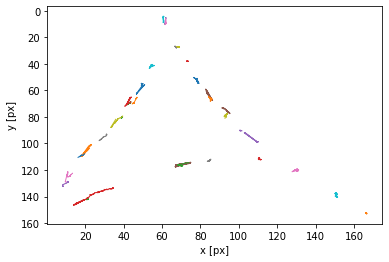

In [4]:
f = bmc.annotate(path, show=False, diameter=11, minmass=150, crop=((0,26), (27,0)))
t = bmc.get_trajectories(f, show=True, diameter=11, minmass=150, search_range=10, clip_stubs=50)

In [5]:
all_v, x_v, y_v = bmc.particle_velocity(t, 0, x20, 30)

Text(0.5, 1.0, 'velocity histogram')

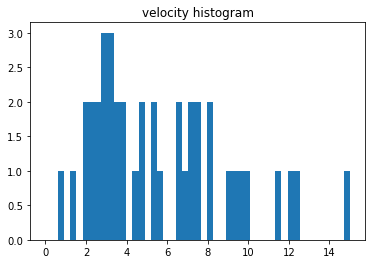

In [6]:
plt.figure()
_ = plt.hist(all_v, bins=np.linspace(0, 15))
plt.title("velocity histogram")

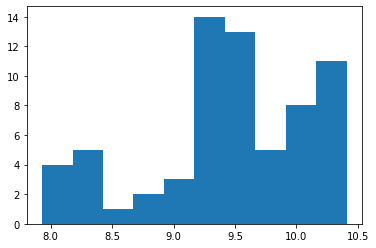

In [7]:
plt.figure()
_ = plt.hist(bmc.viscosity(t, 1, x20, 30))

In [8]:
t[t["frame"]==0]["particle"].values

array([ 0,  1,  2,  4,  6,  7, 11, 13, 14, 15, 16, 19, 21])

## Onion 4

Frame 249: 19 trajectories present.


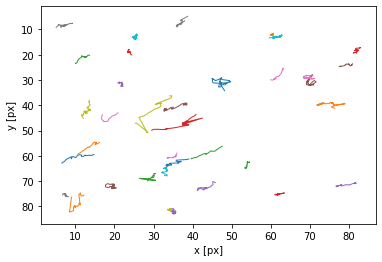

../data/onion_4/Onion_bulk_20x-11


In [11]:
i = 19
folder_paths = glob.glob("../data/onion_4/*")
path = folder_paths[i] + "/*bmp"

f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
t = bmc.get_trajectories(f, show=True, diameter=11, minmass=10, search_range=6, clip_stubs=25)
print(folder_paths[i])

In [12]:
lengths = []
for folder in folder_paths:
    files = glob.glob(folder + "/*bmp")
    lengths.append(len(files))

In [57]:
def all_viscosity(t):
    all_visc = np.array([])
    for i in np.unique(t["particle"]):
        all_visc = np.append(all_visc, np.mean(bmc.viscosity(t, i, x20, fps)))
    return all_visc

def all_velocity(t):
    all_vel = np.array([])
    x_vel = np.array([])
    y_vel = np.array([])
    mean_dx = np.array([])
    mean_dy = np.array([])
    for i in np.unique(t["particle"]):
        mean_dx = np.append(mean_dx, np.mean(np.diff(t["x"])))
        mean_dy = np.append(mean_dy, np.mean(np.diff(t["y"])))
        mag, x, y = bmc.particle_velocity(t, i, x20, fps)
        all_vel = np.append(all_vel, np.mean(mag))
        x_vel = np.append(x_vel, np.mean(x))
        y_vel = np.append(y_vel, np.mean(y))
    return all_vel, x_vel, y_vel, mean_dx, mean_dy

In [112]:
total_velocities = np.array([])
x_velocities = np.array([])
y_velocities = np.array([])
all_viscosities= np.array([])
dx = np.array([])
dy = np.array([])
for folder in folder_paths:
    path = folder + "/*bmp"
    f = bmc.annotate(path, show=False, diameter=11, minmass=10)#, crop=((0,26), (27,0)))
    t = bmc.get_trajectories(f, show=False, diameter=11, minmass=10, search_range=6, clip_stubs=25)
    mag, x, y, mdx, mdy = all_velocity(t)
    mask = (mdx > 1e-4) + (mdy > 1e-4)
    dx = np.append(dx, mdx)
    dy = np.append(dy, mdy)
    total_velocities = np.append(total_velocities, mag[mask])
    x_velocities = np.append(x_velocities, x[mask])
    y_velocities = np.append(y_velocities, y[mask])
    all_viscosities= np.append(all_viscosities, all_viscosity(t)[mask])

Frame 246: 13 trajectories present.


In [113]:
len(np.unique(total_velocities)), len(np.unique(all_viscosities))

(610, 610)

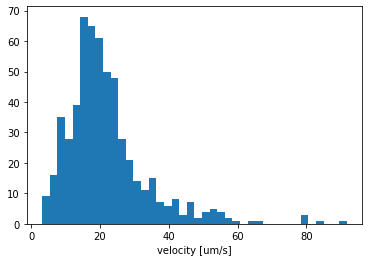

In [107]:
plt.figure()
cnts,_,_ = plt.hist(total_velocities, bins=40)#, bins=np.linspace(0,13))
plt.xlabel("velocity [um/s]");

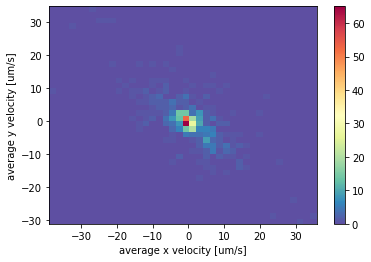

In [110]:
bins = np.linspace(-10,10,40)
plt.figure()
_ = plt.hist2d(x_velocities, y_velocities, bins=(40, 40), cmap="Spectral_r")
plt.colorbar()
plt.xlabel("average x velocity [um/s]")
plt.ylabel("average y velocity [um/s]");

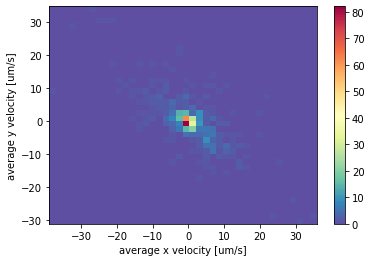

In [114]:
bins = np.linspace(-10,10,40)
plt.figure()
_ = plt.hist2d(x_velocities, y_velocities, bins=(40, 40), cmap="Spectral_r")
plt.colorbar()
plt.xlabel("average x velocity [um/s]")
plt.ylabel("average y velocity [um/s]");

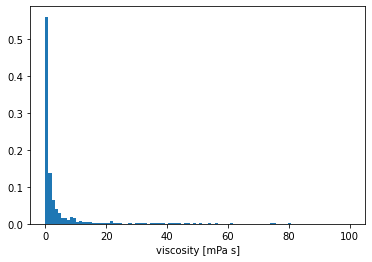

In [29]:
plt.figure()
cnts,_,_ = plt.hist(all_viscosities, bins=np.linspace(0,100, 100), density=1)#, bins=np.linspace(0,13))
plt.xlabel("viscosity [mPa s]");

In [ ]:
np.unique(t["particle"])